# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# url for Open Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":weather_api_key,
    "units":"imperial"
    
}
# city container list
city_data = []

In [17]:
# Print Log of Each City
print("Beginning Data Retrieval ")
print("------------------------")

# counter list
set_counter = 1
record_counter = 1

for city in cities:
    params["q"] = city
    response = requests.get(url, params=params)
    # when looping through, skip if city isn't found
    if response.ok == False:
        print(" City not found.   Skipping...")
        time.sleep(1)
        pass
    else:    
        response_json = response.json()
        weather_dict = {
            "City":response_json["name"], 
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"],
            "Latitude":response_json["coord"]["lat"],
            "Longitude":response_json["coord"]["lon"],
            "Cloudiness":response_json["clouds"]["all"],
            "Humidity":response_json["main"]["humidity"],
            "Max Temp":response_json["main"]["temp_max"],
            "Wind Speed":response_json["wind"]["speed"]
        }
        city_data.append(weather_dict)
        print(f"Processing Record {record_counter} of Set {set_counter} | {weather_dict['City']}")
        record_counter += 1

        #utilize the counter
        if record_counter % 50 == 0:
            set_counter += 1
            record_counter = 1

print("------------------------")
print("-----     END    -------")
print("------------------------")

Beginning Data Retrieval 
------------------------
Processing Record 1 of Set 1 | Bluff
Processing Record 2 of Set 1 | Tiksi
Processing Record 3 of Set 1 | Atuona
 City not found.   Skipping...
Processing Record 4 of Set 1 | Kavaratti
Processing Record 5 of Set 1 | Kapaa
Processing Record 6 of Set 1 | Puerto Ayora
Processing Record 7 of Set 1 | Tasiilaq
Processing Record 8 of Set 1 | Gutierrez Zamora
Processing Record 9 of Set 1 | Kavieng
Processing Record 10 of Set 1 | Samur
Processing Record 11 of Set 1 | Nikolskoye
Processing Record 12 of Set 1 | Dikson
Processing Record 13 of Set 1 | Mackenzie
Processing Record 14 of Set 1 | Castro
Processing Record 15 of Set 1 | Punta Arenas
 City not found.   Skipping...
Processing Record 16 of Set 1 | Tokur
 City not found.   Skipping...
Processing Record 17 of Set 1 | Kodinar
Processing Record 18 of Set 1 | Vaini
Processing Record 19 of Set 1 | Busselton
Processing Record 20 of Set 1 | Ushuaia
Processing Record 21 of Set 1 | Blagoyevo
Processin

Processing Record 35 of Set 4 | Taman
Processing Record 36 of Set 4 | Farah
Processing Record 37 of Set 4 | Qaanaaq
Processing Record 38 of Set 4 | Geraldton
Processing Record 39 of Set 4 | Benghazi
Processing Record 40 of Set 4 | Broome
Processing Record 41 of Set 4 | Yertsevo
 City not found.   Skipping...
Processing Record 42 of Set 4 | Sao Joao da Barra
Processing Record 43 of Set 4 | Emerald
Processing Record 44 of Set 4 | Asau
Processing Record 45 of Set 4 | Provideniya
Processing Record 46 of Set 4 | Kalmunai
Processing Record 47 of Set 4 | Magadan
Processing Record 48 of Set 4 | Talara
Processing Record 49 of Set 4 | Nuuk
Processing Record 1 of Set 5 | Prince Rupert
Processing Record 2 of Set 5 | Maracacume
Processing Record 3 of Set 5 | Muli
Processing Record 4 of Set 5 | La Orilla
Processing Record 5 of Set 5 | Oum Hadjer
Processing Record 6 of Set 5 | Sur
Processing Record 7 of Set 5 | Ngunguru
Processing Record 8 of Set 5 | Codrington
Processing Record 9 of Set 5 | Santa Is

Processing Record 24 of Set 8 | Jiuquan
Processing Record 25 of Set 8 | Elko
Processing Record 26 of Set 8 | Deputatsky
Processing Record 27 of Set 8 | Yellapur
Processing Record 28 of Set 8 | Flinders
Processing Record 29 of Set 8 | Klaksvik
Processing Record 30 of Set 8 | Arman
Processing Record 31 of Set 8 | Antalaha
Processing Record 32 of Set 8 | Trairi
Processing Record 33 of Set 8 | Meulaboh
Processing Record 34 of Set 8 | Ahar
Processing Record 35 of Set 8 | Atambua
Processing Record 36 of Set 8 | Guerrero Negro
Processing Record 37 of Set 8 | Penha
Processing Record 38 of Set 8 | Luau
Processing Record 39 of Set 8 | Jasper
Processing Record 40 of Set 8 | Samandag
Processing Record 41 of Set 8 | Darab
Processing Record 42 of Set 8 | Jalu
Processing Record 43 of Set 8 | Prince Albert
Processing Record 44 of Set 8 | Jumla
Processing Record 45 of Set 8 | Rawson
Processing Record 46 of Set 8 | Quryq
Processing Record 47 of Set 8 | Autazes
Processing Record 48 of Set 8 | Ambilobe
Pr

Processing Record 16 of Set 12 | Itapetininga
 City not found.   Skipping...
Processing Record 17 of Set 12 | Pouembout
Processing Record 18 of Set 12 | Guozhen
Processing Record 19 of Set 12 | Whitecourt
Processing Record 20 of Set 12 | Jizan
Processing Record 21 of Set 12 | Inhuma
Processing Record 22 of Set 12 | Teknaf
 City not found.   Skipping...
 City not found.   Skipping...
Processing Record 23 of Set 12 | Grants
Processing Record 24 of Set 12 | Cabra
Processing Record 25 of Set 12 | Korla
Processing Record 26 of Set 12 | Esim
Processing Record 27 of Set 12 | Dzaoudzi
Processing Record 28 of Set 12 | Laureles
Processing Record 29 of Set 12 | Cayenne
Processing Record 30 of Set 12 | Isangel
Processing Record 31 of Set 12 | Topaowan
Processing Record 32 of Set 12 | Sinnamary
Processing Record 33 of Set 12 | Katobu
------------------------
-----     END    -------
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Dataframe
city_pd = pd.DataFrame(city_data)

lat = city_pd["Latitude"]
maxtemp = city_pd["Max Temp"]
hum = city_pd["Humidity"]
winds = city_pd["Wind Speed"]
clouds = city_pd["Cloudiness"]

# Display Dataframe
city_pd.to_csv(output_data_file, index_label="City_ID")
city_pd.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Bluff,NZ,1579306788,-46.60,168.33,100,49,68.85,3.94
1,Tiksi,RU,1579306788,71.69,128.87,19,87,-15.86,12.15
2,Atuona,PF,1579306552,-9.80,-139.03,68,74,82.13,18.99
3,Kavaratti,IN,1579306790,10.57,72.64,54,74,79.95,13.96
4,Kapaa,US,1579306790,22.08,-159.32,75,60,78.80,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

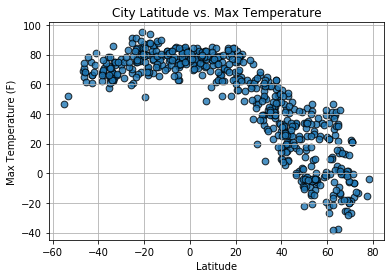

In [19]:
plt.scatter(lat, maxtemp, marker="o", edgecolor="black", s= 45, alpha=0.8)
plt.title("City Latitude vs. Max Temperature");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (F)");
plt.grid();
plt.savefig("output_data/Lat_vs_Temp.png");
plt.show()

#### Latitude vs. Humidity Plot

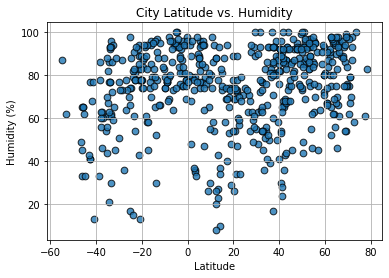

In [20]:
plt.scatter(lat, hum, marker="o", edgecolor="black", s= 45, 
            alpha=0.8)
plt.title("City Latitude vs. Humidity");
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.grid();
plt.savefig("output_data/Lat_vs_Humidity.png");
plt.show()

#### Latitude vs. Cloudiness Plot

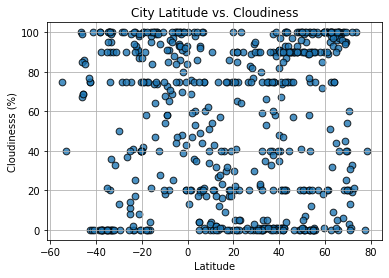

In [21]:
plt.scatter(lat, clouds, marker="o", edgecolor="black", s= 45, 
            alpha=0.8)
plt.title("City Latitude vs. Cloudiness");
plt.xlabel("Latitude");
plt.ylabel("Cloudinesss (%)");
plt.grid();
plt.savefig("output_data/Lat_vs_Cloudiness.png");
plt.show()

#### Latitude vs. Wind Speed Plot

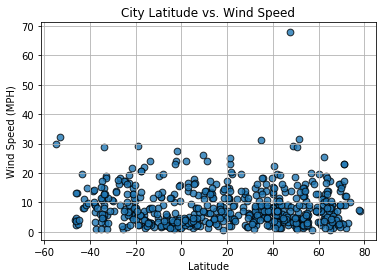

In [22]:
plt.scatter(lat, winds, marker="o", edgecolor="black", s= 45, 
            alpha=0.8)
plt.title("City Latitude vs. Wind Speed");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (MPH)");
plt.grid();
plt.savefig("output_data/Lat_vs_WindSpeed.png");
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


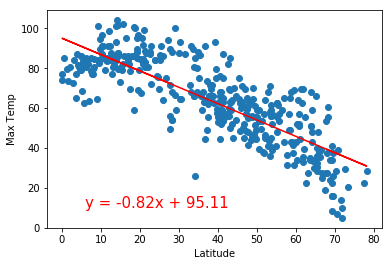

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


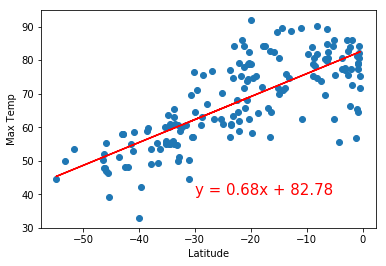

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


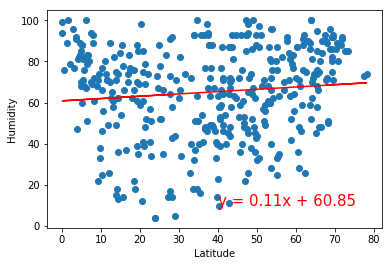

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


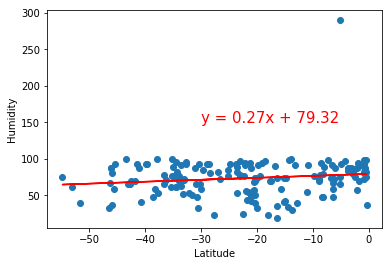

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


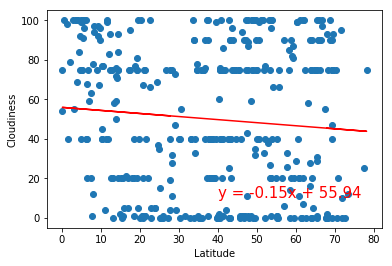

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


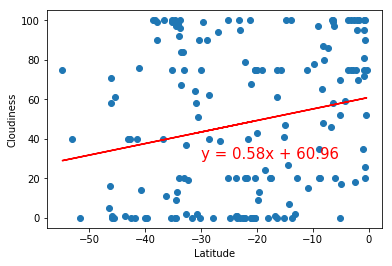

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


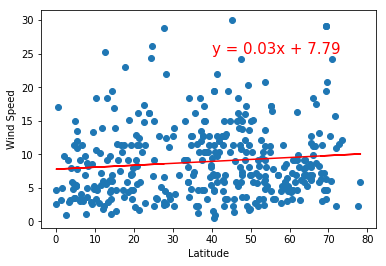

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


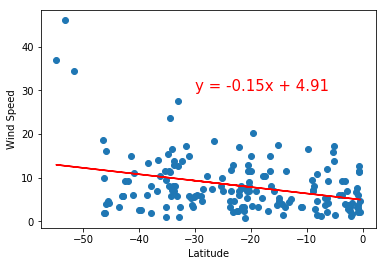